In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
np.random.seed(401)
import tensorflow as tf
tf.random.set_seed(401)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, f1_score

import hughes_data 
import argparse 
import pickle
import math

import random
random.seed(401)


In [2]:
import hughes_castnet_main
#why is locations 3984

num_train_years: 6
window_size: 3
lead_time: 1
Difference (num_train_years - (window_size + lead_time - 1)): 3
window_size: 3 lead_time: 1 time_unit: 1 train_ratio: 0.75 test_ratio: 0.15 group_lasso: True gl_reg_coef: 0.0025 orthogonal_loss_coef: 0.01 num_spatial_heads: 4
train_svi_global: (3984, 3, 1328, 6) train_svi_local: (3984, 3, 6) train_static: (3984, 2) train_dist: (3984, 1328) train_y: (3984,)
valid_svi_global: (1328, 3, 1328, 6) valid_svi_local: (1328, 3, 6) valid_static: (1328, 2) valid_dist: (1328, 1328) valid_y: (1328,)
test_svi_global: (1328, 3, 1328, 6) test_svi_local: (1328, 3, 6) test_static: (1328, 2) test_dist: (1328, 1328) test_y: (1328,)
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


/Users/jyontika/Desktop/Python/github_hughes/opioid-overdose-models/CASTNet/hughes-CASTNet/hughes_castnet_model.py:70: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  self.local_lstm_cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(self.HIDDEN_LAYER_SIZE)
/Users/jyontika/Desktop/Python/github_hughes/opioid-overdose-models/CASTNet/hughes-CASTNet/hughes_castnet_model.py:89: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  global_lstm_cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(self.HIDDEN_LAYER_SIZE)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
3984


TypeError: object of type 'int' has no len()

In [ ]:
predictions = hughes_castnet_main.predictions
len(predictions) 

mean_value = np.mean(predictions)
median_value = np.median(predictions)

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

min_value = min(predictions)
max_value = max(predictions)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

#look at paper - are they using model that obeys constraint of non-negative 
# did they say they would fix neg values pre-processing (ie, -3 --> 0)

Mean: 0.7193264961242676
Median: 0.7255375981330872
Minimum value: 0.5683437585830688
Maximum value: 0.8757677674293518


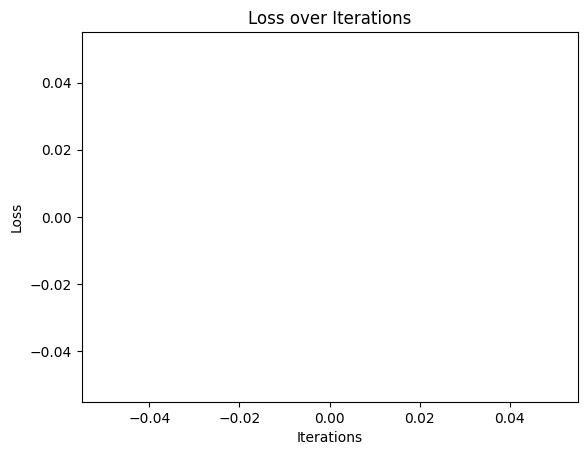

In [ ]:
import matplotlib.pyplot as plt
loss_values = hughes_castnet_main.castnet.results['loss']

iterations = range(1, len(loss_values) + 1)

plt.plot(iterations, loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

#look into how they make batches, could we remove any batching and redefine it so it is always loading full dataset.



In [ ]:
results_path = '/Users/jyontika/Desktop/Python/github_hughes/opioid-overdose-models/CASTNet/hughes-CASTNet/Results/Chicago_test_time_False.pkl'

with open(results_path, 'rb') as file:
    results = pickle.load(file, encoding='bytes')

In [ ]:
#results